In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow와 PyTorch는 선택적으로 사용하므로, 필요에 따라 import합니다.
# TensorFlow 예시
import tensorflow as tf

# PyTorch 예시
import torch
import torch.nn as nn
import torch.optim as optim


In [ ]:
# ,으로 구분된 데이터를 올바르게 불러오기 위해 sep 파라미터를 사용
train_data = pd.read_csv('wafer_TRAIN', header=None, sep=',')
test_data = pd.read_csv('wafer_TEST', header=None, sep=',')

# iloc를 사용하여 첫 번째 컬럼을 제외한 나머지 모든 컬럼을 X_train으로 지정(첫 번째 컬럼이 레이블)
X_train = train_data.iloc[:, 1:]
y_train = train_data.iloc[:, 0]
X_test = test_data.iloc[:, 1:]
y_test = test_data.iloc[:, 0]

print(X_train.head())
print(y_train.head())


       1        2        3        4        5        6        7        8    \
0 -1.60230 -1.67080 -1.69370 -1.69940 -1.69940 -1.70370 -1.70370 -1.70370   
1  1.08460  1.08460  1.08460  1.06530  1.06530  1.06530  1.06530  1.06530   
2  0.36269  0.36269  0.36269  0.39332  0.36269  0.36269  0.36269  0.36269   
3 -1.09450 -1.09450 -1.09450 -1.09670 -1.09450 -1.09670 -1.09450 -1.09450   
4 -1.10380 -1.10380 -1.10380 -1.10380 -1.10380 -1.10380 -1.10380 -1.10380   

       9        10   ...      143      144      145      146      147  \
0 -1.70370 -1.70370  ... -1.14540 -1.14540 -1.14540 -1.14540 -1.14540   
1  1.06530  1.08460  ...  1.06530  1.06530  1.06530  1.06530  1.06530   
2  0.36269  0.36269  ...  0.39332  0.39332  0.39332  0.36269  0.39332   
3 -1.09450 -1.09670  ... -1.09670 -1.09670 -1.09670 -1.09670 -1.09670   
4 -1.10380 -1.10380  ... -1.10380 -1.10380 -1.10380 -1.10380 -1.10380   

       148      149      150      151      152  
0 -1.14540 -1.14540 -1.14540 -1.14540 -1.14540  


## 결측치 확인

In [ ]:
missing_values_train = train_data.isnull().sum().sum()
missing_values_test = test_data.isnull().sum().sum()

print(f"Train data missing values: {missing_values_train}")
print(f"Test data missing values: {missing_values_test}")

Train data missing values: 0
Test data missing values: 0


In [ ]:
#스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#SMOTE 적용
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
#B-SMOTE1적용
from imblearn.over_sampling import BorderlineSMOTE

blsmote = BorderlineSMOTE(random_state=42, kind='borderline-1') # 'borderline-2'도 가능
X_resampled, y_resampled = blsmote.fit_resample(X_train, y_train)

In [ ]:
#B-SMOTE2적용
from imblearn.over_sampling import BorderlineSMOTE

blsmote = BorderlineSMOTE(random_state=42, kind='borderline-2') # 'borderline-2'도 가능
X_resampled2, y_resampled2 = blsmote.fit_resample(X_train, y_train)

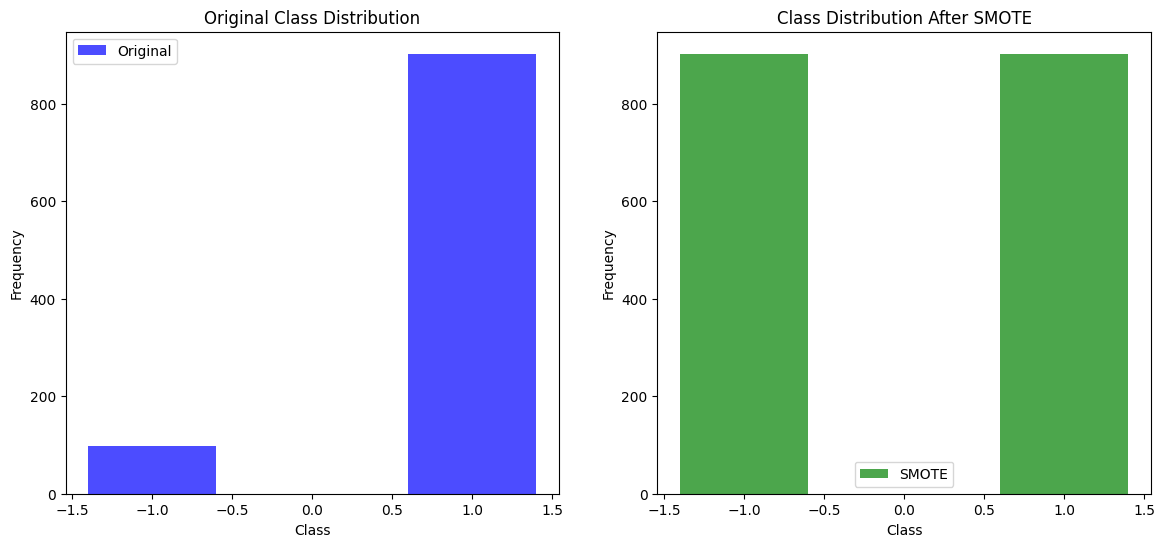

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 원본 데이터의 클래스 분포
unique_original, counts_original = np.unique(y_train, return_counts=True)

# SMOTE 적용 후 데이터의 클래스 분포
unique_resampled, counts_resampled = np.unique(y_train_res, return_counts=True)

plt.figure(figsize=(14, 6))

# 원본 데이터의 클래스 분포 시각화
plt.subplot(1, 2, 1)
plt.bar(unique_original, counts_original, color='blue', alpha=0.7, label='Original')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.legend()

# SMOTE 적용 후 데이터의 클래스 분포 시각화
plt.subplot(1, 2, 2)
plt.bar(unique_resampled, counts_resampled, color='green', alpha=0.7, label='SMOTE')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.legend()

plt.show()

# SMOTE

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# 모델 생성
rf_clf = RandomForestClassifier(random_state=42)

# 모델 학습
rf_clf.fit(X_train_res, y_train_res)

# 테스트 데이터셋으로 모델 평가
y_pred = rf_clf.predict(X_test_scaled)

# 평가 메트릭 출력
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# 교차 검증을 통한 모델 성능 평가
cross_val_scores = cross_val_score(rf_clf, X_train_res, y_train_res, cv=5)

print("Cross-validated scores:", cross_val_scores)
print("Mean cross-validated score:", cross_val_scores.mean())

# 위 코드는 RandomForestClassifier를 사용하여 모델을 학습하고, 평가 메트릭으로 정확도와 분류 보고서를 출력합니다.
# 또한 5-겹 교차 검증을 통해 모델의 일반화 성능을 평가합니다.


              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       665
           1       1.00      1.00      1.00      5499

    accuracy                           0.99      6164
   macro avg       0.98      0.98      0.98      6164
weighted avg       0.99      0.99      0.99      6164

Accuracy: 0.9920506164828033
Cross-validated scores: [1.         1.         0.99722992 1.         0.99722992]
Mean cross-validated score: 0.9988919667590028


# 기본


In [ ]:
rf_clf.fit(X_train, y_train)

# 테스트 데이터셋으로 모델 평가
y_pred = rf_clf.predict(X_test_scaled)

# 평가 메트릭 출력
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# 교차 검증을 통한 모델 성능 평가
cross_val_scores = cross_val_score(rf_clf, X_train_scaled, y_train, cv=5)

print("Cross-validated scores:", cross_val_scores)
print("Mean cross-validated score:", cross_val_scores.mean())

              precision    recall  f1-score   support

          -1       0.97      0.86      0.92       665
           1       0.98      1.00      0.99      5499

    accuracy                           0.98      6164
   macro avg       0.98      0.93      0.95      6164
weighted avg       0.98      0.98      0.98      6164

Accuracy: 0.9828033744321869
Cross-validated scores: [0.97  0.985 0.985 0.99  0.99 ]
Mean cross-validated score: 0.984


#B-SMOTE

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# 모델 생성
rf_clf = RandomForestClassifier(random_state=42)

# 모델 학습
rf_clf.fit(X_resampled, y_resampled)

# 테스트 데이터셋으로 모델 평가
y_pred = rf_clf.predict(X_test_scaled)

# 평가 메트릭 출력
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# 교차 검증을 통한 모델 성능 평가
cross_val_scores = cross_val_score(rf_clf, X_resampled, y_resampled, cv=5)

print("Cross-validated scores:", cross_val_scores)
print("Mean cross-validated score:", cross_val_scores.mean())

# 위 코드는 RandomForestClassifier를 사용하여 모델을 학습하고, 평가 메트릭으로 정확도와 분류 보고서를 출력합니다.
# 또한 5-겹 교차 검증을 통해 모델의 일반화 성능을 평가합니다.


              precision    recall  f1-score   support

          -1       0.56      0.72      0.63       665
           1       0.96      0.93      0.95      5499

    accuracy                           0.91      6164
   macro avg       0.76      0.82      0.79      6164
weighted avg       0.92      0.91      0.91      6164

Accuracy: 0.9093121349772875
Cross-validated scores: [0.80110497 1.         0.99445983 1.         1.        ]
Mean cross-validated score: 0.9591129612341408


# B-smote 2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# 모델 생성
rf_clf = RandomForestClassifier(random_state=42)

# 모델 학습
rf_clf.fit(X_resampled2, y_resampled2)

# 테스트 데이터셋으로 모델 평가
y_pred = rf_clf.predict(X_test_scaled)

# 평가 메트릭 출력
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# 교차 검증을 통한 모델 성능 평가
cross_val_scores = cross_val_score(rf_clf, X_resampled2, y_resampled2, cv=5)

print("Cross-validated scores:", cross_val_scores)
print("Mean cross-validated score:", cross_val_scores.mean())

# 위 코드는 RandomForestClassifier를 사용하여 모델을 학습하고, 평가 메트릭으로 정확도와 분류 보고서를 출력합니다.
# 또한 5-겹 교차 검증을 통해 모델의 일반화 성능을 평가합니다.


              precision    recall  f1-score   support

          -1       0.25      0.80      0.38       665
           1       0.97      0.71      0.82      5499

    accuracy                           0.72      6164
   macro avg       0.61      0.76      0.60      6164
weighted avg       0.89      0.72      0.77      6164

Accuracy: 0.7193380921479559
Cross-validated scores: [0.80886427 1.         0.99445983 1.         0.98614958]
Mean cross-validated score: 0.9578947368421054


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# 모델 생성
rf_clf = RandomForestClassifier(random_state=42)

# 모델 학습
rf_clf.fit(X_train_res, y_train_res)

# 테스트 데이터셋으로 모델 평가
y_pred = rf_clf.predict(X_test_scaled)

# 평가 메트릭 출력
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# 교차 검증을 통한 모델 성능 평가
cross_val_scores = cross_val_score(rf_clf, X_train_res, y_train_res, cv=5)

print("Cross-validated scores:", cross_val_scores)
print("Mean cross-validated score:", cross_val_scores.mean())

# 위 코드는 RandomForestClassifier를 사용하여 모델을 학습하고, 평가 메트릭으로 정확도와 분류 보고서를 출력합니다.
# 또한 5-겹 교차 검증을 통해 모델의 일반화 성능을 평가합니다.


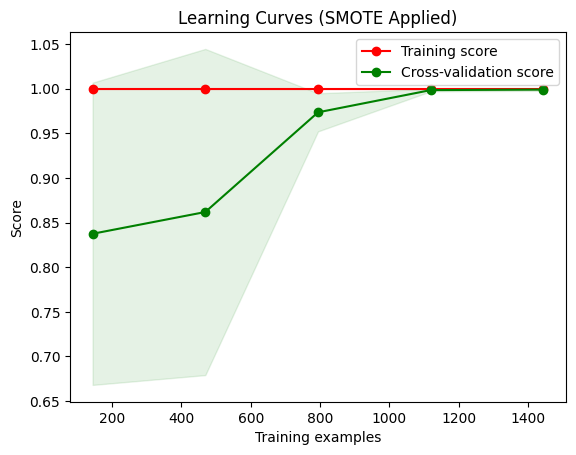

In [ ]:
from sklearn.model_selection import learning_curve

# SMOTE 적용 후 학습 곡선 계산
train_sizes_res, train_scores_res, test_scores_res = learning_curve(
    RandomForestClassifier(random_state=42), X_train_res, y_train_res, cv=5,
    n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

# 평균과 표준 편차 계산
train_scores_mean_res = np.mean(train_scores_res, axis=1)
train_scores_std_res = np.std(train_scores_res, axis=1)
test_scores_mean_res = np.mean(test_scores_res, axis=1)
test_scores_std_res = np.std(test_scores_res, axis=1)

plt.figure()
plt.title("Learning Curves (SMOTE Applied)")
plt.xlabel("Training examples")
plt.ylabel("Score")

# 훈련 점수 셰이딩
plt.fill_between(train_sizes_res, train_scores_mean_res - train_scores_std_res,
                 train_scores_mean_res + train_scores_std_res, alpha=0.1, color="r")
# 테스트 점수 셰이딩
plt.fill_between(train_sizes_res, test_scores_mean_res - test_scores_std_res,
                 test_scores_mean_res + test_scores_std_res, alpha=0.1, color="g")

plt.plot(train_sizes_res, train_scores_mean_res, 'o-', color="r", label="Training score")
plt.plot(train_sizes_res, test_scores_mean_res, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

#T-smote 구현해보기
- spy based method

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from imblearn.over_sampling import SMOTE

# 가정: 소수 클래스와 다수 클래스 레이블이 이미 정의되어 있음
minority_class = -1
majority_class = 1

# 스파이 샘플 선택을 위한 함수
def select_spy_samples(X, y, spy_ratio=0.15):
    majority_indices = np.where(y == majority_class)[0]
    num_spies = int(len(majority_indices) * spy_ratio)
    spy_indices = np.random.choice(majority_indices, size=num_spies, replace=False)
    return spy_indices

# SMOTE와 스파이 기반 방법을 조합한 합성 샘플 생성 함수
def generate_samples(X, y, spy_ratio, leading_time, threshold):
    spy_indices = select_spy_samples(X, y, spy_ratio=spy_ratio)

    # 스파이 샘플을 소수 클래스에 임시 할당
    y_modified = y.copy()
    y_modified[spy_indices] = minority_class

    # SMOTE 적용
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y_modified)

    # 리딩 타임과 임계값을 고려하여 추가적인 조건에 따른 샘플 선택 및 합성 로직 필요
    # 이 부분은 데이터의 특성과 결정된 임계값에 따라 달라집니다.

    return X_resampled, y_resampled

# 함수 호출 예시
spy_ratio = 0.15
leading_time = 10 # 예시 값
threshold = 0.2 # 예시 값
X_resampled, y_resampled = generate_samples(X_train_scaled, y_train, spy_ratio, leading_time, threshold)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# 랜덤 포레스트 분류기 인스턴스 생성
rf_clf = RandomForestClassifier(random_state=42)

# 학습 데이터셋으로 모델 학습
rf_clf.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
# 테스트 데이터셋으로 모델 성능 평가
y_pred = rf_clf.predict(X_test_scaled)

# 성능 메트릭 출력
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.52      0.99      0.68       665
           1       1.00      0.89      0.94      5499

    accuracy                           0.90      6164
   macro avg       0.76      0.94      0.81      6164
weighted avg       0.95      0.90      0.91      6164

Accuracy: 0.899740428293316


In [ ]:
# 교차 검증을 통한 모델 성능 평가
cross_val_scores = cross_val_score(rf_clf, X_resampled, y_resampled, cv=5)

print("Cross-validated scores:", cross_val_scores)
print("Mean cross-validated score:", cross_val_scores.mean())

Cross-validated scores: [0.82792208 0.84039088 0.87947883 0.87296417 0.84364821]
Mean cross-validated score: 0.8528808325225263


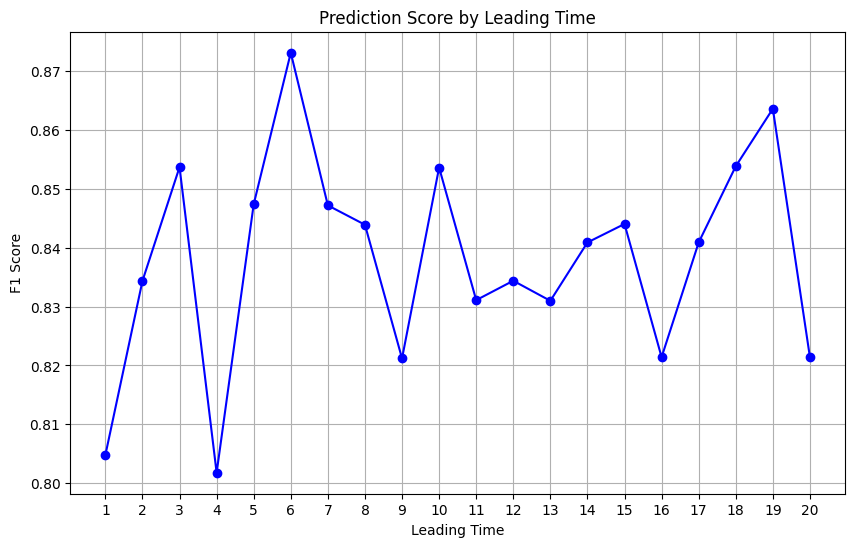

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 가정: 소수 클래스 레이블이 -1, 다수 클래스 레이블이 1
minority_class = -1
majority_class = 1

# SMOTE와 함께 사용할 'spy' 샘플 선택 함수
def select_spy_samples(X, y, spy_ratio):
    majority_indices = np.where(y == majority_class)[0]
    spy_indices = np.random.choice(majority_indices, size=int(len(majority_indices) * spy_ratio), replace=False)
    y_spy = np.array(y)
    y_spy[spy_indices] = minority_class  # 스파이 샘플을 소수 클래스로 변경
    return X, y_spy

# 리딩 타임에 따른 데이터 합성 로직 (여기서는 임시로 정의)
def generate_samples_with_leading_time(X, y, leading_time, threshold, spy_ratio):
    X_spy, y_spy = select_spy_samples(X, y, spy_ratio)
    smote = SMOTE(sampling_strategy=1.0, random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_spy, y_spy)
    return X_resampled, y_resampled

# 리딩 타임별 F1 스코어 시각화를 위한 리스트
f1_scores_by_leading_time = []

# 리딩 타임 1부터 20까지 반복
for leading_time in range(1, 21):
    # 임계값을 찾는 과정 (여기서는 최적의 임계값을 예측하는 로직을 생략하고, 임의로 설정)
    threshold = 0.1  # 임의로 설정한 임계값

    # 리딩 타임에 따른 데이터 합성
    X_resampled, y_resampled = generate_samples_with_leading_time(
        X_train_scaled, y_train, leading_time, threshold, spy_ratio=0.15
    )

    # 데이터 분할, 모델 학습, 예측 및 F1 스코어 계산
    X_train_part, X_val, y_train_part, y_val = train_test_split(
        X_resampled, y_resampled, test_size=0.2, random_state=42
    )
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_part, y_train_part)
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred, average='macro')
    f1_scores_by_leading_time.append(f1)

# 리딩 타임별 F1 스코어 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), f1_scores_by_leading_time, marker='o', linestyle='-', color='b')
plt.title('Prediction Score by Leading Time')
plt.xlabel('Leading Time')
plt.ylabel('F1 Score')
plt.grid(True)
plt.xticks(range(1, 21))
plt.show()
